### ROC Curve

## 📌 Step 1: Understanding the Basics
In this section, we'll learn what a ROC curve is and why it's useful.

### **Key Terms:**
- **True Positive (TP)**
- **False Positive (FP)**
- **True Negative (TN)**
- **False Negative (FN)**
- **True Positive Rate (TPR)** = TP / (TP + FN)
- **False Positive Rate (FPR)** = FP / (FP + TN)
- **Area Under the Curve (AUC)**

📚 **Question:** Why is it important to have a high TPR and a low FPR?


<details>
  <summary>📚 Click to reveal the answer</summary>
  ✅ **Answer:** A high TPR ensures that most actual positive cases are correctly identified, reducing missed detections. A low FPR ensures that negative cases are not incorrectly classified as positive, preventing false alarms. Together, they improve the reliability of the model.
</details>

---

## 📌 Step 2: Generating Sample Data
We will create a synthetic dataset and visualize the class distribution.


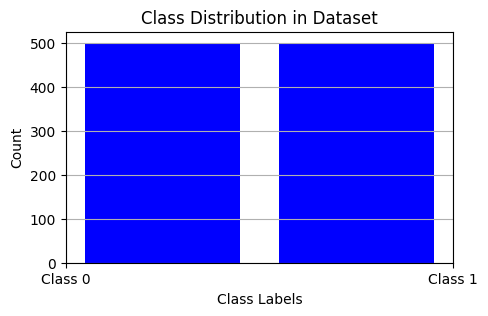

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Visualizing the class distribution
plt.figure(figsize=(5, 3))
plt.hist(y, bins=2, rwidth=0.8, color='blue')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution in Dataset')
plt.grid()
plt.show()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


📚 **Question:** What does splitting data into training and testing help with?

<details>
  <summary>📚 Click to reveal the answer</summary>
  ✅ **Answer:** Splitting data helps evaluate the model's performance on unseen data, ensuring it generalizes well and does not overfit to the training set.
</details>

---

## 📌 Step 3: Training a Classifier
We will train a **Random Forest classifier**, a machine learning model that uses multiple decision trees.

<details>
  <summary>📚 Click to reveal '<b>What is sklearn.ensemble?</b>'</summary>

  # 📌 What is sklearn.ensemble?
  It contains various ensemble methods such as **Bagging, Boosting, and Stacking**, which combine multiple models to achieve better performance.

  ## 🔹 Key Algorithms in sklearn.ensemble

  ### **1️⃣ Bagging Methods (Bootstrap Aggregating)**
  - Train multiple models **in parallel** on random subsets of the data.
  - Helps **reduce overfitting** and increase **stability**.

  #### **🔸 Example: RandomForestClassifier**
  A collection of multiple decision trees.

  ```
  from sklearn.ensemble import RandomForestClassifier

  clf = RandomForestClassifier(n_estimators=100, random_state=42)
  clf.fit(X_train, y_train)
  ```

  #### 📌 **What does this do?**
  - `n_estimators=100`: Uses **100 decision trees**.
  - Trains trees **independently** and takes the **majority vote** for classification.

  ---

  ### **2️⃣ Boosting Methods**
  - Train models **sequentially**, where each model corrects the errors of the previous one.
  - Improves accuracy but can be **prone to overfitting**.

  #### **🔸 Example: GradientBoostingClassifier**
  A boosting method that builds models sequentially.

  ```
  from sklearn.ensemble import GradientBoostingClassifier

  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
  clf.fit(X_train, y_train)
  ```

  #### 📌 **What does this do?**
  - `n_estimators=100`: Uses **100 weak models**.
  - `learning_rate=0.1`: Controls **how much each model corrects previous errors**.

  #### **Other Boosting Methods:**
  - `AdaBoostClassifier` (**Adaptive Boosting**)
  - `XGBClassifier` (**Extreme Gradient Boosting**, from `xgboost` library)

  ---

  ### **3️⃣ Stacking (Stacked Generalization)**
  - Combines predictions from multiple models using a **meta-model**.
  - Unlike bagging/boosting, it can **mix different types of models**.

  #### **🔸 Example: StackingClassifier**
  Combines multiple models into a single classifier.

  ```
  from sklearn.ensemble import StackingClassifier
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier

  estimators = [
      ('dt', DecisionTreeClassifier()),
      ('rf', RandomForestClassifier())
  ]

  stacked_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
  stacked_clf.fit(X_train, y_train)
  ```

  #### 📌 **What does this do?**
  - **Combines** Decision Trees and Random Forests.
  - Uses **Logistic Regression** as the final model.

  ---

  ## 🔹 **When to Use Each Ensemble Method?**

  | **Ensemble Method**  | **Works Best When...** | **Pros** | **Cons** |
  |-----------------|------------------|------|------|
  | **Bagging (e.g., Random Forest)** | High variance models (like Decision Trees) | Reduces overfitting | Can be slow |
  | **Boosting (e.g., Gradient Boosting, AdaBoost)** | Need high accuracy | Corrects mistakes, strong performance | Can overfit |
  | **Stacking** | Want to combine different models | Uses multiple models' strengths | Complex to tune |

  ---

  ## 🚀 **Summary**
  ✅ `sklearn.ensemble` provides **Bagging, Boosting, and Stacking** methods.  
  ✅ **Bagging (RandomForest)** reduces variance, **Boosting (GradientBoosting)** improves accuracy, and **Stacking** combines models.  
  ✅ Use **ensembles** when a **single model isn't performing well**.  

</details>

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Check model performance
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f'Training Accuracy: {train_score:.2f}')
print(f'Test Accuracy: {test_score:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.89



📚 **Question:** What does a classifier do in machine learning?


<details>
  <summary>📚 Click to reveal the answer</summary>
  ✅ **Answer:** A classifier assigns input data to predefined categories or labels based on learned patterns from training data.
</details>


---

## 📌 Step 4: Computing the ROC Curve
We compute the **True Positive Rate (TPR)** and **False Positive Rate (FPR)** at different thresholds.

In [6]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

### let's check `y_probs`

In [19]:
y_probs[:10]

array([0.07, 1.  , 0.44, 0.82, 0.  , 0.99, 0.02, 0.05, 0.14, 0.21])

### 📌 Why Do Classifiers Return Probabilities Instead of 0 or 1?

Most machine learning classifiers return **probability values** instead of direct `0` or `1` predictions because probabilities provide **more flexibility** in decision-making. Here's why:

---

## **1️⃣ Probability Gives Confidence Instead of a Fixed Decision**
A classifier doesn't just guess **"this is class 1"** or **"this is class 0"**—it calculates **how confident** it is in that prediction.

✅ **Example:**

| Sample | Probability (`y_prob`) | Default Prediction (`y_pred` at threshold=0.5) |
|--------|------------------|--------------------|
| A      | 0.95             | 1 (Positive) |
| B      | 0.60             | 1 (Positive) |
| C      | 0.45             | 0 (Negative) |
| D      | 0.05             | 0 (Negative) |

- Sample **A** has a **95% confidence** in being class **1**.  
- Sample **D** has only **5% confidence**, so it's classified as **0**.  
- **Probabilities allow adjusting the threshold** for better control over predictions.

---

## **2️⃣ Adjusting the Classification Threshold**
By default, many classifiers use **0.5 as the threshold**:

- **If probability ≥ 0.5 → classify as 1**  
- **If probability < 0.5 → classify as 0**  

However, we can **change the threshold** depending on the problem.

🔹 **If we want fewer false positives:**  
- Use a **higher threshold** (e.g., `0.7`) to classify as **1** only if very confident.  

🔹 **If we want fewer false negatives:**  
- Use a **lower threshold** (e.g., `0.3`) to catch more positive cases.  

✅ **Example in Python:**
````
import numpy as np

y_probs = np.array([0.95, 0.60, 0.45, 0.05])  # Predicted probabilities
threshold = 0.7  # Custom threshold
y_pred = (y_probs >= threshold).astype(int)  # Convert to 0 or 1

print(y_pred)  # Output: [1 0 0 0] (Only confident ones are classified as 1)
````

---  

## 3️⃣ Some Models Are Naturally Probabilistic.
Certain classifiers inherently produce probability values instead of hard 0/1 predictions:

  - ✅ Logistic Regression → Uses the sigmoid function to give probabilities.
  - ✅ Random Forest & Decision Trees → Average votes from multiple trees.
  - ✅ Naive Bayes → Uses Bayes' theorem to calculate probability.

📌 Other models (like SVMs) don’t natively output probabilities but can be modified to do so (e.g., SVC(probability=True) in scikit-learn).



In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

print("False Positive Rate:\n", fpr)
print("True Positive Rate:\n", tpr)
print("Thresholds:\n", thresholds)


False Positive Rate:
 [0.         0.         0.         0.         0.         0.
 0.         0.01481481 0.01481481 0.02222222 0.02222222 0.02222222
 0.02222222 0.02222222 0.02222222 0.02222222 0.02222222 0.02222222
 0.02222222 0.02222222 0.02222222 0.02962963 0.03703704 0.03703704
 0.05185185 0.05185185 0.06666667 0.08148148 0.08148148 0.0962963
 0.1037037  0.1037037  0.11851852 0.13333333 0.13333333 0.14814815
 0.14814815 0.15555556 0.17037037 0.17037037 0.18518519 0.19259259
 0.2        0.21481481 0.22962963 0.25925926 0.27407407 0.28888889
 0.2962963  0.31111111 0.34814815 0.36296296 0.37037037 0.4
 0.42962963 0.4962963  0.61481481 0.68888889 0.78518519 0.85185185
 1.        ]
True Positive Rate:
 [0.         0.23636364 0.35757576 0.41818182 0.44848485 0.51515152
 0.53939394 0.57575758 0.6        0.63636364 0.66060606 0.67272727
 0.67878788 0.6969697  0.72121212 0.73939394 0.74545455 0.76969697
 0.77575758 0.78787879 0.79393939 0.79393939 0.81212121 0.82424242
 0.83636364 0.84848485

#### **`Here, notice fpr and tpr values are arrays.`**   

The False Positive Rate (FPR) and True Positive Rate (TPR) are arrays because they are computed at multiple threshold values.

**`Why are FPR and TPR arrays?`**  
The ROC curve is plotted by changing the classification threshold.
Each threshold gives different FPR and TPR values.
sklearn.metrics.roc_curve computes these values for a range of thresholds.

#### **What are Thresholds in an ROC Curve?**
A threshold in classification determines when to classify a prediction as positive (1) or negative (0).    

    * If the predicted probability is above the threshold, classify it as positive (1).  
    * If the predicted probability is below the threshold, classify it as negative (0).  


### **Visualizing threshold values**

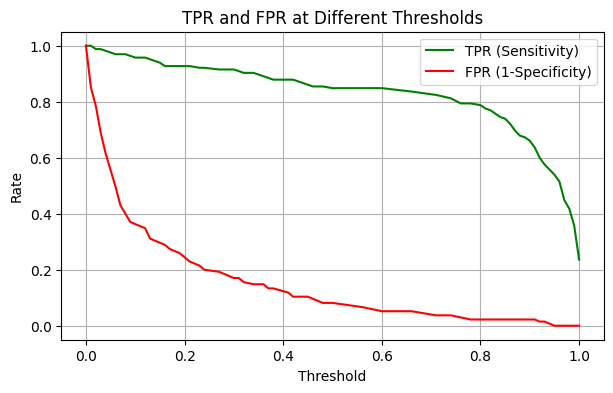

In [7]:
plt.figure(figsize=(7, 4))
plt.plot(thresholds, tpr, label='TPR (Sensitivity)', color='green')
plt.plot(thresholds, fpr, label='FPR (1-Specificity)', color='red')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR at Different Thresholds')
plt.legend()
plt.grid()
plt.show()



📚 **Question:** What does adjusting the threshold affect in a classification model?


<details>
  <summary>📚 Click to reveal the answer</summary>
  ✅ **Answer:** Adjusting the threshold changes the balance between sensitivity (TPR) and specificity (1 - FPR). A lower threshold increases TPR but also increases FPR, while a higher threshold reduces FPR but may lower TPR.
</details>


---

## 📌 Step 5: Plotting the ROC Curve
Now, we will visualize the ROC curve.

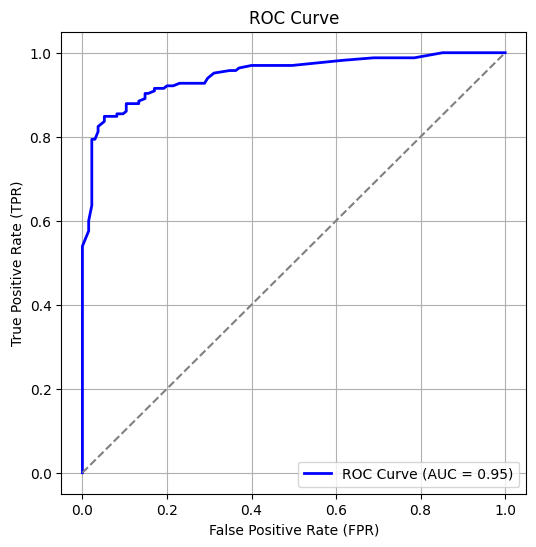

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


📚 **Question:** If AUC = 0.5, what does it mean for the classifier?

<details>
  <summary>📚 Click to reveal the answer</summary>
  ✅ **Answer:** An AUC of 0.5 indicates that the classifier is performing no better than random guessing and has no discriminatory power between classes.
</details>